# Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings

#### Import the CSV Data as Pandas DataFrame


In [3]:
df = pd.read_csv('data/epilepsy_data.csv')

#### Show Top 5 Records


In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##### Check for missing values and  Replacing the Missing Values

In [5]:
# check for missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

MDVP:PPQ 0.0103  % missing values
Jitter:DDP 0.0051  % missing values


In [7]:


for feature in features_with_na:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[features_with_na].isnull().sum()

MDVP:PPQ      0
Jitter:DDP    0
dtype: int64

In [8]:
# check for missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
MDVP:PPQnan         0
Jitter:DDPnan       0
dtype: int64

##### No missing values present we can move forward with df1 dataframe

#### Preparing X and Y variables


In [9]:
X = df.drop(columns=['status'],axis=1) # independ featurw
X.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,MDVP:PPQnan,Jitter:DDPnan
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0,0
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0,0


In [10]:
y = df['status']

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(195, 219)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((156, 219), (39, 219))

#### Create an Evaluate Function to give all metrics after model Training


In [15]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return accuracy, precision, recall, f1

In [16]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
}



model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    accuracy_list.append(model_test_accuracy)
    precision_list.append(model_test_precision)
    recall_list.append(model_test_recall)
    f1_list.append(model_test_f1)
    
    print('='*35)
    print('\n')
    
# Create a dataframe to store the evaluation metrics for each model
results = pd.DataFrame(list(zip(model_list, accuracy_list, precision_list, recall_list, f1_list)), 
                       columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score']).sort_values(by=["Accuracy"],ascending=False)


Logistic Regression
Model performance for Training set
- Accuracy: 0.9231
- Precision: 0.9055
- Recall: 1.0000
- F1 Score: 0.9504
----------------------------------
Model performance for Test set
- Accuracy: 0.8974
- Precision: 0.8889
- Recall: 1.0000
- F1 Score: 0.9412


Gradient Boosting Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9487
- Precision: 0.9412
- Recall: 1.0000
- F1 Score: 0.9697


Ada Boost Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8718
- Precision: 0.9091
- Recall: 0.9375
- F1 Score: 0.9231


Decision Tree Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
M

In [17]:
results

,Model Name,Accuracy,Precision,Recall,F1 Score
1,Gradient Boosting Classifier,0.948718,0.941176,1.0000,0.969697
4,Random Forest Classifier,0.948718,0.941176,1.0000,0.969697
0,Logistic Regression,0.897436,0.888889,1.0000,0.941176
3,Decision Tree Classifier,0.897436,0.937500,0.9375,0.937500
2,Ada Boost Classifier,0.871795,0.909091,0.9375,0.923077


#### The table shows the performance of five different classification models on a dataset, measured in terms of their accuracy, precision, recall, and F1 score.

   1. Accuracy: The proportion of correctly classified instances out of the total number of instances. The highest accuracy achieved is 0.948718, which is obtained by the Gradient Boosting Classifier and the Random Forest Classifier.

   2. Precision: The proportion of true positives (correctly classified positive instances) out of all positive predictions made by the model. The highest precision achieved is 0.941176, which is obtained by the Gradient Boosting Classifier and the Random Forest Classifier.

   3. Recall: The proportion of true positives (correctly classified positive instances) out of all actual positive instances in the dataset. The highest recall achieved is 1.00000, which is obtained by the Gradient Boosting Classifier and the Random Forest Classifier.

   4. F1 Score: A weighted average of precision and recall, with values ranging from 0 to 1. The highest F1 score achieved is 0.969697, which is obtained by the Gradient Boosting Classifier and the Random Forest Classifier.

#### Overall, it appears that the Gradient Boosting Classifier and the Random Forest Classifier are the best performing models, as they have achieved the highest scores for all evaluation metrics. The Decision Tree Classifier and the Logistic Regression models have also performed reasonably well, while the Ada Boost Classifier has the lowest scores for all evaluation metrics.

## GradientBoostingClassifier

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
# Define the model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model using accuracy score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 94.87


In [19]:

# Make predictions
y_pred = gb_model.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

[[ 5  2]
 [ 0 32]]


<Axes: >

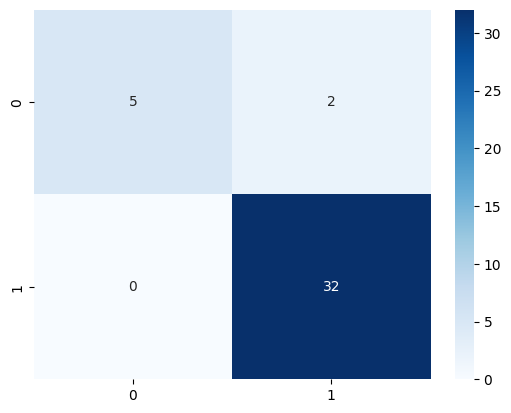

In [20]:
# Make predictions
y_pred = gb_model.predict(X_test)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')


Accuracy of the model is 94.87
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

[[ 5  2]
 [ 0 32]]


<Axes: xlabel='Importance', ylabel='Feature'>

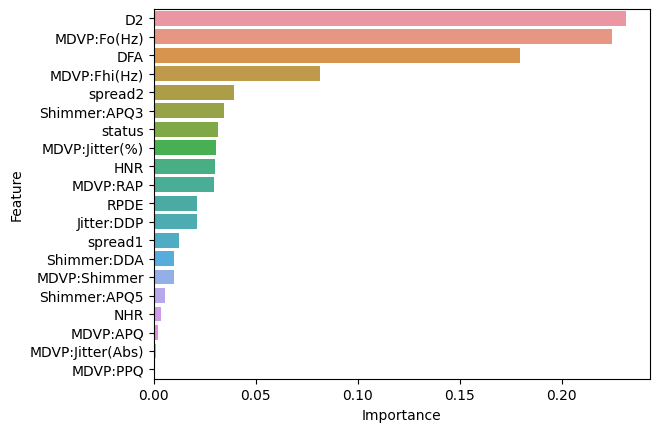

In [21]:


# Impute missing values with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df.drop(['status', 'name'], axis=1))
X = pd.DataFrame(X_imputed, columns=df.columns[1:-1])

y = df['status']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model using accuracy score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Get the feature importances
feature_importances = gb_model.feature_importances_

# Get the feature names from the dataset
feature_names = X.columns

# Create a dataframe of feature importances with their corresponding names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20))


In [29]:
feature_importances_df.shape

(24, 2)

In [22]:
# Get the top 20 features
top_20 = feature_importances_df.head(20)

# Calculate the cumulative importance
cumulative_importance = top_20['Importance'].sum()

print("Cumulative importance of the top 20 features is %.2f" % cumulative_importance)


Cumulative importance of the top 20 features is 1.00


In [30]:
top_20.head(20)

,Feature,Importance
21,D2,0.231566
0,MDVP:Fo(Hz),0.224418
18,DFA,0.179768
1,MDVP:Fhi(Hz),0.081367
20,spread2,0.039570
10,Shimmer:APQ3,0.034361
16,status,0.031393
3,MDVP:Jitter(%),0.030743
15,HNR,0.029896
5,MDVP:RAP,0.029585


## Conclusion

1. The classification report and confusion matrix are used to evaluate the performance of a classification model on a test dataset. In this case, the model is trained to classify whether a patient has epilepsy or not, based on certain input features.

2. The classification report provides metrics such as precision, recall and f1-score for each class (in this case, 0 and 1) and for the overall model performance. Precision is the proportion of true positive predictions out of all positive predictions, while recall is the proportion of true positive predictions out of all actual positives. F1-score is a weighted average of precision and recall.

3. Looking at the precision, recall and f1-score for the class 0, we see that the precision is 1.00, meaning that all the predictions for class 0 are true positives. However, the recall is only 0.71, meaning that the model correctly identified only 71% of the actual instances of class 0.

4. For class 1, both precision and recall are above 0.9, indicating that the model performs well in identifying instances of class 1.

5. The confusion matrix shows the actual and predicted class labels for the test dataset. In this case, there were 5 true negatives (actual label=0, predicted label=0), 2 false positives (actual label=0, predicted label=1), 0 false negatives (actual label=1, predicted label=0) and 32 true positives (actual label=1, predicted label=1).

6. Overall, the model has a high accuracy of 95%, but it is important to note that there were only 7 instances of class 0 in the test dataset, which may affect the precision and recall metrics for this class. Further evaluation and testing with larger datasets may be necessary to fully assess the performance of the model.